<a href="https://colab.research.google.com/github/TatkovDmitriy/Yandex_Practicum/blob/Product_analyses/PET_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%90%D0%91_%D1%82%D0%B5%D1%81%D1%82%D1%8B_%D0%B2_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B5_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 A/B/C-тест сервиса такси «Карету мне»

Вам предстоит выступить в роли **продуктового аналитика** сервиса такси **«Карету мне»**.

## 🔍 Проблема

Дискавери показало, что пассажиры **чаще отменяют заказы**, если **предварительное время ожидания машины не совпадает с реальным**.  
Пользователи видят, что такси не успевает к обещанному времени, и отменяют заказы.  
Если предварительное и реальное время ожидания **сильно различаются**, пользователь может отменить заказ сразу.

## 💡 Гипотеза

> **Более точный прогноз времени ожидания повысит качество пользовательского опыта.  
> Это, в свою очередь, увеличит вероятность того, что заказ завершится поездкой.**

Для решения этой проблемы в компании была разработана **новая математическая модель**, которая точнее прогнозирует время ожидания.  
Сейчас реализовано **два варианта модели** с небольшими различиями.

## 🎯 Цель

Проверить гипотезу с помощью **A/B/C-эксперимента** и проанализировать результаты.

## 🛠️ Задачи аналитика

- Определить и рассчитать параметры теста
- Оценить корректность проведения теста
- Проанализировать результаты теста

Создайте новую копию шаблона эксперимента и заполняйте его по мере выполнения заданий.

---

## 📁 Описание данных

Вы будете работать с **тремя таблицами**:

### Таблица `users` — данные о пользователях (2024-01-01 по 2024-10-27)

| Поле             | Описание                                                |
|------------------|---------------------------------------------------------|
| `user_id`        | Уникальный идентификатор пользователя                   |
| `registration_date` | Дата регистрации в сервисе                        |
| `country_code`   | Код страны пользователя (RU, BY, KZ, UZ)               |
| `traffic_type`   | Источник привлечения (organic, paid, referral)         |
| `platform`       | Платформа пользователя (android, ios)                  |

### Таблица `events` — события в приложении (2024-09-23 по 2024-10-27)

| Поле          | Описание                                                    |
|---------------|-------------------------------------------------------------|
| `user_id`     | Уникальный идентификатор пользователя                       |
| `time`        | Время события                                               |
| `session_id`  | Идентификатор сессии                                        |
| `event_name`  | Название события                                            |

События включают:
- `app_start` — запуск приложения
- `registration_complete` — завершение регистрации
- `order_initiate` — открытие экрана заказа
- `order_create` — создание заказа
- `order_cancel` — отмена заказа
- `order_rate` — выставление оценки заказу

### Таблица `orders` — данные о заказах (2024-09-23 по 2024-10-27)

| Поле               | Описание                                                    |
|--------------------|-------------------------------------------------------------|
| `user_id`          | Уникальный идентификатор пользователя                       |
| `order_id`         | Уникальный идентификатор заказа                             |
| `order_time`       | Время создания заказа                                       |
| `ride_start_time`  | Время начала поездки                                        |
| `ride_finish_time` | Время завершения поездки                                    |
| `status`           | Статус заказа (`completed`, `cancelled_order_by_client`, `cancelled_order_by_driver`) |
| `paid_amt`         | Стоимость заказа                                            |
| `payment_type`     | Тип оплаты (`cash`, `card`, `na`)                          |

---

## 🔄 Этапы

Вам предстоит пройти все этапы тестирования:

1. Подготовка
2. Дизайн эксперимента
3. Проведение
4. Анализ результатов


# 📐 Задание: расчёт MDE (Minimum Detectable Effect)

## 🎯 Цель
Рассчитать **минимально обнаруживаемый эффект (MDE)** ключевой метрики на разных уровнях пользовательского трафика.

---

## 🔑 Ключевая метрика
**Конверсия из создания заказа в успешную поездку**.

**Формула:**

---

## 🗓️ Период анализа

Используйте **предэкспериментальные данные**:

📅 **с 2024-09-23 по 2024-10-06**

---

## 📌 Условие

- Относительный MDE должен быть **не выше 4%** (в долях — ≤ 0.04).
- Нужно протестировать **разные уровни трафика**, начиная с **10% аудитории**, с шагом **+10%** (то есть 10%, 20%, ..., 100%).

---

## 🧪 Задача

Найти **минимальную долю трафика**, при которой значение **MDE** будет удовлетворять условию (≤ 4%).

---

## 🧠 Подсказка

Воспользуйтесь функцией расчёта MDE по формуле или через `statsmodels.stats.power.NormalIndPower`.

Результат будет использоваться для определения необходимого объёма выборки в A/B/C-тесте.


In [1]:
import pandas as pd
from scipy.stats import t

# Загружаем данные
orders = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_orders.csv')
orders['order_time'] = pd.to_datetime(orders['order_time'])

# Параметры
alpha = 0.05
beta = 0.2
group_count = 3  # A/B/C-тест

# Период предпериода
start_date = pd.Timestamp('2024-09-23 00:00:00')
end_date = pd.Timestamp('2024-10-06 23:59:59')

# Фильтрация и агрегация
data_exp_orders = orders[
    (orders['order_time'] >= start_date) &
    (orders['order_time'] <= end_date) &
    (orders['status'] != 'cancelled_order_by_driver')]

completed_orders = data_exp_orders[data_exp_orders['status'] == 'completed'].groupby('user_id')[
    'order_id'].nunique().reset_index().rename(columns={'order_id': 'completed_orders'})

total_orders = data_exp_orders.groupby('user_id')[
    'order_id'].nunique().reset_index().rename(columns={'order_id': 'total_orders'})

df_merged = pd.merge(completed_orders, total_orders, how='outer', on='user_id').fillna(0)

# Глобальное значение конверсии
global_ratio = df_merged['completed_orders'].sum() / df_merged['total_orders'].sum()

# Линеаризация
df_merged['linearized_metric'] = df_merged['completed_orders'] - global_ratio * df_merged['total_orders']

# Тестируем разные доли трафика
for rollout_share in range(10, 101, 10):
    n_total = len(df_merged) * (rollout_share / 100)
    n = n_total / group_count
    degrees_of_freedom = n_total - group_count

    std = df_merged['linearized_metric'].std()
    mean = df_merged['linearized_metric'].mean()

    t_alpha = t.ppf(1 - alpha / 2, degrees_of_freedom)
    t_beta = t.ppf(1 - beta, degrees_of_freedom)

    left_factor = (t_alpha + t_beta) ** 2
    right_factor = 2 * (std ** 2) / n
    MDE_lin = (left_factor * right_factor) ** 0.5

    abs_mde = MDE_lin / df_merged['total_orders'].mean()
    rel_mde = ((abs_mde / global_ratio) * 100).round(2)

    print(f"Трафик: {rollout_share}% — Относительный MDE: {rel_mde}%")

    if rel_mde <= 4:
        print(f"\n✅ Минимальный трафик, при котором MDE ≤ 4%: {rollout_share}%")
        break


Трафик: 10% — Относительный MDE: 7.08%
Трафик: 20% — Относительный MDE: 5.0%
Трафик: 30% — Относительный MDE: 4.08%
Трафик: 40% — Относительный MDE: 3.53%

✅ Минимальный трафик, при котором MDE ≤ 4%: 40%


# ✅ Тест запущен! Подробности эксперимента

Соберём все параметры теста в единую таблицу для дальнейшего анализа:

| **Параметр**                                               | **Значение**                                                                 |
|------------------------------------------------------------|------------------------------------------------------------------------------|
| **Старт теста**                                            | 14.10.2024                                                                   |
| **Окончание теста**                                        | 27.10.2024                                                                   |
| **Длительность теста**                                     | 14 дней                                                                      |
| **Уровень статистической значимости (alpha)**             | 0.0167 *(с учётом поправки Бонферрони)*                                     |
| **Мощность теста (power)**                                 | 0.8                                                                          |
| **Ключевая метрика**                                       | Конверсия из создания заказа в успешную поездку                             |
| **MDE (абсолютное значение)**                              | 0.031904                                                                     |
| **MDE (относительное значение)**                           | 3.65%                                                                        |
| **Статистический критерий**                                | t-test Стьюдента                                                             |
| **Экспериментальные группы и сплит**                       | control, treatment_1, treatment_2 *(по 33% каждая)*                         |
| **Количество тестируемых парных сравнений**                | 3 *(control vs treatment_1, control vs treatment_2, treatment_1 vs treatment_2)* |
| **Нулевая гипотеза**                                       | Средние значения ключевой метрики у групп A и B в генеральной совокупности равны |
| **Альтернативная гипотеза**                                | Средние значения ключевой метрики у групп A и B в генеральной совокупности различаются |
| **Дополнительные условия**                                 | 1. Поправка Бонферрони<br>2. Линеаризация ключевой метрики                 |
| **Барьерные метрики**                                      | Выручка на пользователя экспериментальных групп                             |
| **Вспомогательные метрики**                                | - Конверсия из просмотра формы в создание заказа<br>- Количество поездок на пользователя |

---

## 📂 Таблица `split_data`

Содержит информацию о распределении пользователей по группам:

| Поле         | Описание                                         |
|--------------|--------------------------------------------------|
| `user_id`    | Уникальный идентификатор пользователя            |
| `time`       | Время попадания пользователя в группу            |
| `group_name` | Название экспериментальной группы (`control`, `treatment_1`, `treatment_2`) |


# 🧪 Задание 1: Сплит пользователей

## 🎯 Цель
Проверить корректность распределения пользователей по экспериментальным группам.  
Пользователи **не должны находиться одновременно в нескольких группах**.

---

## 🔍 Условие
В исходной таблице `split_data` возможны случаи, когда один и тот же пользователь попал в несколько экспериментальных групп.

---

## ✅ Задача
Очистить таблицу `split_data` от дублирующихся `user_id`, чтобы **каждый пользователь был только в одной группе**.

Результат сохранить в новую таблицу:

```python
split_data_correct


In [2]:
import pandas as pd

split_data = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_split_data.csv')

split_data['time'] = pd.to_datetime(split_data['time'])

# Считаем кол-во уникальных групп на user_id
flawed_users = split_data.groupby('user_id')['group_name'].nunique().reset_index()

# Фильтруем клиентов у которых больше 1 группы
flawed_users = flawed_users[flawed_users['group_name'] > 1]

# Убираем пользователей, попавших в несколько групп
split_data_correct = split_data[~split_data['user_id'].isin(flawed_users['user_id'])]

print('Данные очищены')

Данные очищены


# 🔧 Задание 2: Подготовка данных

## 🎯 Цель
Подготовить **датасеты заказов и событий за период эксперимента** для последующего расчёта всех метрик.  
Это позволит **избежать повторной фильтрации и объединения данных** при каждом вычислении.

---

## 📌 Инструкции

1. **Отфильтруйте заказы** за период эксперимента:
   - 📅 С 14.10.2024 по 27.10.2024
   - 🛑 Удалите заказы со статусом `cancelled_order_by_driver`
   - ✅ Оставьте только заказы со статусами:
     - `completed`
     - `cancelled_order_by_client`

2. **Отфильтруйте события** за тот же период.

3. **Добавьте к обоим датасетам** информацию о группе (`group_name`) пользователя из таблицы `split_data_correct`.

---

## 🧩 Подсказка

Используйте `merge()` по полю `user_id`, чтобы объединить таблицы `orders` и `events` с `split_data_correct`.

Пример кода для заказов:
```python
orders_filtered = (
    orders.query("'2024-10-14' <= order_time <= '2024-10-27'")
    .query("status != 'cancelled_order_by_driver'")
    .merge(split_data_correct[['user_id', 'group_name']], on='user_id', how='inner')
)


In [3]:
import pandas as pd

# Настройки отображения DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Загрузка данных
orders = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_orders.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_events.csv')
split_data_correct = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_split_data_correct.csv')

# Преобразование времени
orders['order_time'] = pd.to_datetime(orders['order_time'])
events['time'] = pd.to_datetime(events['time'])
split_data_correct['time'] = pd.to_datetime(split_data_correct['time'])

# Указываем переменные начала и конца экспериментального периода
start_date = pd.Timestamp('2024-10-14 00:00:00')
end_date = pd.Timestamp('2024-10-27 23:59:59')

# Фильтруем датасет заказов по дате и статусу
data_exp_orders = orders[
    (orders['order_time'] >= start_date) &
    (orders['order_time'] <= end_date) &
    (orders['status'] != 'cancelled_order_by_driver')
]

# Фильтруем датасет событий по дате
data_exp_events = events[
    (events['time'] >= start_date) &
    (events['time'] <= end_date)
]

# Объединение заказов с группами — используем только нужные столбцы, не трогая split_data_correct
data_exp_orders = pd.merge(
    data_exp_orders,
    split_data_correct[['user_id', 'group_name']],
    on='user_id',
    how='inner'
)

# Объединение событий с группами
data_exp_events = pd.merge(
    data_exp_events,
    split_data_correct[['user_id', 'group_name']],
    on='user_id',
    how='inner'
)

print(data_exp_orders.head(5))
print(data_exp_events.head(5))


   index                               user_id                              order_id          order_time          ride_start_time     ride_finish_time     status  paid_amt payment_type group_name
0     14  00019148-3158-4ebe-aae0-25cd0e1b1b8a  a4e8f585-6963-4de7-9c0d-85631cd0aec3 2024-10-23 02:58:57  2024-10-23 03:05:47.240  2024-10-23 03:41:41  completed      1025         card    control
1     15  00019148-3158-4ebe-aae0-25cd0e1b1b8a  a42ca294-1daf-4abb-8781-16c957cb7336 2024-10-23 07:54:28  2024-10-23 07:59:55.960  2024-10-23 08:24:50  completed       364         card    control
2     16  00019148-3158-4ebe-aae0-25cd0e1b1b8a  a6d71fde-efb8-4087-ba44-1a6c0b164337 2024-10-27 12:03:40  2024-10-27 12:09:47.400  2024-10-27 12:31:30  completed       640         card    control
3    100  001c57aa-e1f1-40bf-9d79-8e064ee03891  736e2057-2e58-4eb6-82ca-12615e7fa533 2024-10-22 08:05:39  2024-10-22 08:12:56.760  2024-10-22 08:36:03  completed       304         card    control
4    182  0031962e-7

# 📈 Задание 3: Кумулятивное значение ключевой метрики

## 🎯 Цель
Построить график **кумулятивной конверсии** из создания заказа в успешную поездку для трёх экспериментальных групп на протяжении всего периода теста.

Это поможет:
- Оценить **динамику поведения пользователей**
- Проверить наличие **временных искажений**
- Сделать **предварительную оценку эффекта гипотезы**

---

## 📌 Формула ключевой метрики

```text
Конверсия = Число завершённых поездок / Общее число заказов


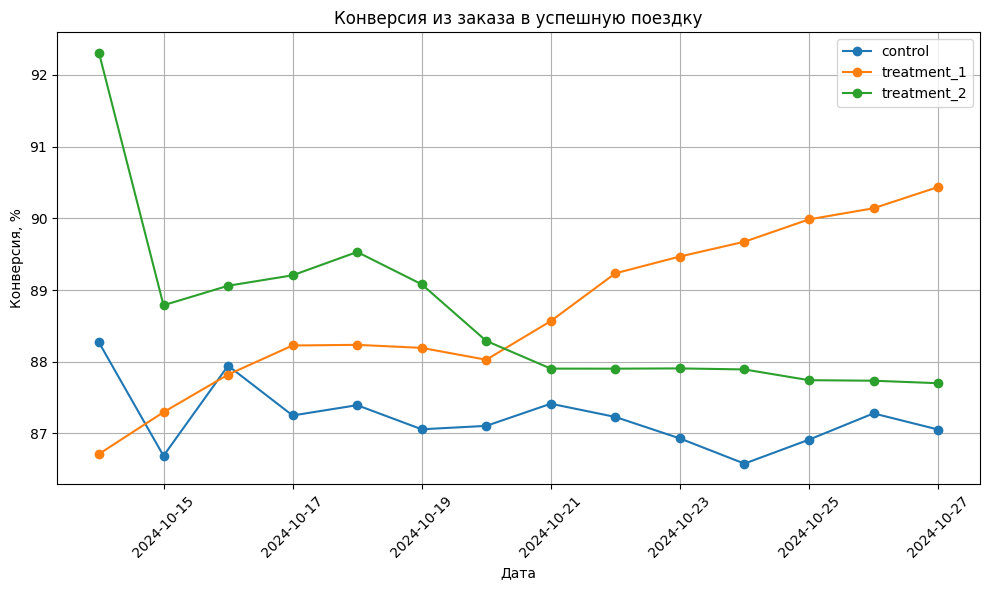

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
data_exp_orders = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_data_exp_orders.csv')
data_exp_orders['order_time'] = pd.to_datetime(data_exp_orders['order_time'])

# Пустой список для результатов
records = []

# Формируем лист дат для цикла и сортируем его
date_list = data_exp_orders['order_time'].dt.date.unique()
date_list.sort()

# Конверсия из создания заказа в успешную поездку
for current_date in date_list:
   # Заказы до текущей даты включительно
   orders_to_date = data_exp_orders[data_exp_orders['order_time'].dt.date <= current_date]
   # Фильтрация по статусу
   completed_orders_to_date = orders_to_date[orders_to_date['status'] == 'completed']

   # Общее количество заказов в каждой группе, столбец с расчётом должен называться total_orders
   total_orders_by_group = orders_to_date.groupby('group_name')['order_id'].nunique().reset_index()
   # Переименование столбца
   total_orders_by_group = total_orders_by_group.rename(columns={'order_id': 'total_orders'})

    # Общее количество завершённых заказов в каждой группе, столбец с расчётом должен называться completed_orders
   completed_orders_by_group = completed_orders_to_date.groupby('group_name')['order_id'].nunique().reset_index()
   # Переименование столбца
   completed_orders_by_group = completed_orders_by_group.rename(columns={'order_id': 'completed_orders'})

   # Объединение и расчёт конверсии
   df_merged_orders = pd.merge(total_orders_by_group, completed_orders_by_group, how='outer', on='group_name')
   df_merged_orders['conversion'] = 100 * df_merged_orders['completed_orders'] / df_merged_orders['total_orders']

   df_merged_orders['date'] = current_date
   records.append(df_merged_orders)

# Собираем в итоговый датафрейм
conversion_df = pd.concat(records)

# Строим график
plt.figure(figsize=(10, 6))
for group in conversion_df['group_name'].unique():
   group_data = conversion_df[conversion_df['group_name'] == group]
   plt.plot(group_data['date'], group_data['conversion'], marker='o', label=group)
plt.title('Конверсия из заказа в успешную поездку')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 💰 Задание 4: Кумулятивное значение барьерной метрики

## 🎯 Цель
Рассчитать и визуализировать **кумулятивную выручку на пользователя** в разрезе экспериментальных групп за весь период теста.

Это поможет:
- Проверить, **не снизилась ли выручка** в результате теста
- Сравнить **платёжную активность** между группами
- Подтвердить **безопасность изменений** для бизнеса

---

## 📌 Формула метрики

```text
Выручка на пользователя = Сумма выручки / Количество уникальных пользователей


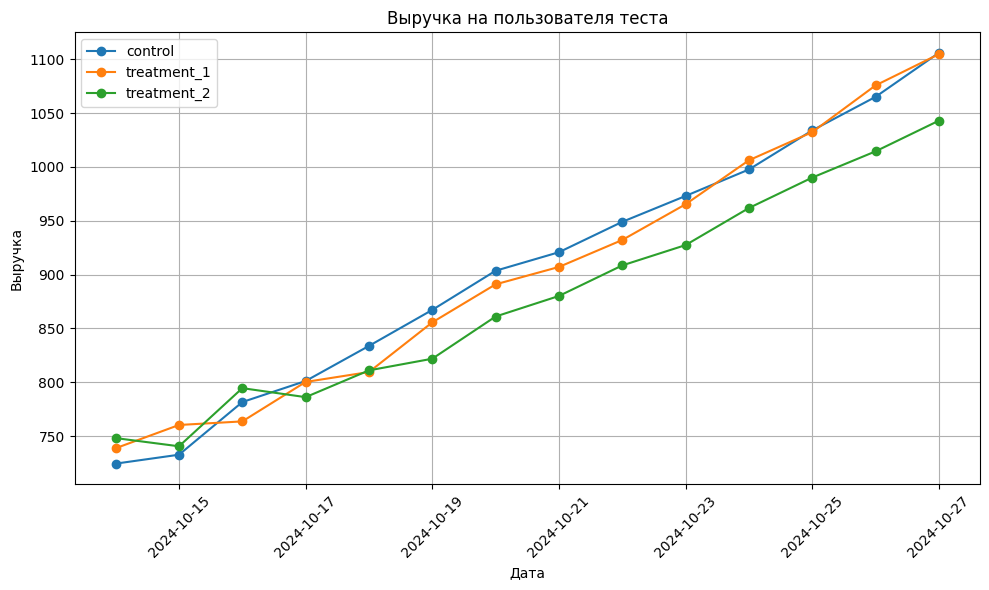

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
data_exp_orders = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_data_exp_orders.csv')
data_exp_orders['order_time'] = pd.to_datetime(data_exp_orders['order_time'])

# Пустой список для результатов
records = []

# Формируем лист дат для цикла и сортируем его
date_list = data_exp_orders['order_time'].dt.date.unique()
date_list.sort()

# Выручка на пользователя теста
for current_date in date_list:
    # Все заказы до текущей даты включительно
    completed_orders_to_date = data_exp_orders[data_exp_orders['order_time'].dt.date <= current_date]
    # Фильтрация по статусу 'completed'
    completed_orders_to_date = completed_orders_to_date[completed_orders_to_date['status'] == 'completed']

    # Суммарная выручка по группам
    summa_by_group = completed_orders_to_date.groupby('group_name')['paid_amt'].sum().reset_index()
    summa_by_group = summa_by_group.rename(columns={'paid_amt': 'revenue_total'})

    # Количество уникальных пользователей, совершивших заказы
    users_by_group = completed_orders_to_date.groupby('group_name')['user_id'].nunique().reset_index()
    users_by_group = users_by_group.rename(columns={'user_id': 'users_total'})

    # Объединение и расчёт выручки на пользователя
    df_merged_orders = pd.merge(summa_by_group, users_by_group, how='outer', on='group_name')
    df_merged_orders['revenue_per_user'] = df_merged_orders['revenue_total'] / df_merged_orders['users_total']

    df_merged_orders['date'] = current_date
    records.append(df_merged_orders)

# Собираем в итоговый датафрейм
revenue_df = pd.concat(records)

# Строим график
plt.figure(figsize=(10, 6))

for group in revenue_df['group_name'].unique():
    group_data = revenue_df[revenue_df['group_name'] == group]
    plt.plot(group_data['date'], group_data['revenue_per_user'], marker='o', label=group)

plt.title('Выручка на пользователя теста')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 📊 Задание 1: Итоги теста — расчёт ключевой метрики

## 🎯 Цель
Построить таблицу **попарного сравнения экспериментальных групп** по **ключевой метрике**:  
**Конверсия из создания заказа в успешную поездку**

---

## 📌 Таблица должна содержать следующие столбцы:

| Столбец                         | Описание                                                                 |
|---------------------------------|--------------------------------------------------------------------------|
| `Группа A`                      | Первая группа сравнения (`control`, `treatment_1`)                      |
| `Группа B`                      | Вторая группа сравнения (`treatment_1`, `treatment_2`)                 |
| `p-value`                       | Значение p-value при сравнении метрики между группами A и B            |
| `Среднее метрики (группа A)`    | Средняя конверсия в группе A (нелинеаризованное значение)              |
| `Среднее метрики (группа B)`    | Средняя конверсия в группе B (нелинеаризованное значение)              |
| `Lift абсолютный`               | Абсолютная разница: среднее B − среднее A                              |
| `Lift относительный (%)`        | Относительная разница: 100 × (B / A − 1)                               |

---

## 🧩 Подсказка

1. Используйте фильтр по `group_name` для построения подтаблиц A и B.
2. Рассчитывайте средние значения по формуле:
```python
conversion = completed_orders / total_orders


In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# Настройки отображения DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Загрузка данных
data_exp_orders = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_data_exp_orders.csv')
data_exp_orders['order_time'] = pd.to_datetime(data_exp_orders['order_time'])

# Расчитываем числитель и знаменатель метрики через группировку и лямбду
df_test = data_exp_orders.groupby(['user_id', 'group_name'], as_index=False).agg(
   total_rides=('order_id', 'count'),
   successful_rides=('status', lambda x: x.eq('completed').sum())
)

# Получаем список всех уникальных групп
groups = sorted(df_test['group_name'].unique())

# Создаём словарь для хранения данных по группам
group_data = {}
for group in groups:
   group_data[group] = df_test[df_test['group_name'] == group]

# Создаём список для хранения результатов
results = []

# Проводим попарные сравнения всех групп
for i in range(len(groups)):
   for j in range(i + 1, len(groups)):
       group1 = groups[i]
       group2 = groups[j]

       # Расчет линейной метрики
       ratio = group_data[group1]['successful_rides'].sum() / group_data[group1]['total_rides'].sum()
       lin_metric1 = group_data[group1]['successful_rides'] - ratio * group_data[group1]['total_rides']
       lin_metric2 = group_data[group2]['successful_rides'] - ratio * group_data[group2]['total_rides']

       # Статистический тест
       _, p_value = ttest_ind(lin_metric1, lin_metric2)

       # Расчет метрик
       mean1 = group_data[group1]['successful_rides'].sum() / group_data[group1]['total_rides'].sum()
       mean2 = group_data[group2]['successful_rides'].sum() / group_data[group2]['total_rides'].sum()

       # Добавление результатов
       results.append({
           'Group A': group1,
           'Group B': group2,
           'p-value': p_value,
           'Mean A': mean1,
           'Mean B': mean2,
           'Absolute Lift': mean2 - mean1,
           'Relative Lift (%)': (mean2 / mean1 - 1) * 100
       })

# Создаём DataFrame из результатов
results_df = pd.DataFrame(results)

# Выводим результаты
print("Результаты сравнения групп:")
print(results_df)

Результаты сравнения групп:
       Group A      Group B   p-value    Mean A    Mean B  Absolute Lift  Relative Lift (%)
0      control  treatment_1  0.000182  0.870543  0.904366       0.033823           3.885230
1      control  treatment_2  0.516517  0.870543  0.877003       0.006460           0.742035
2  treatment_1  treatment_2  0.003372  0.904366  0.877003      -0.027363          -3.025642


# 📊 Задание 2: Итоги теста — вспомогательная метрика 1

## 🎯 Цель
Рассчитать и визуализировать **кумулятивную конверсию из просмотра формы в создание заказа**  
на протяжении всего периода эксперимента.

---

## 📌 Формула метрики

```text
Конверсия = Число пользователей, создавших заказ / Число пользователей, открывших экран заказа


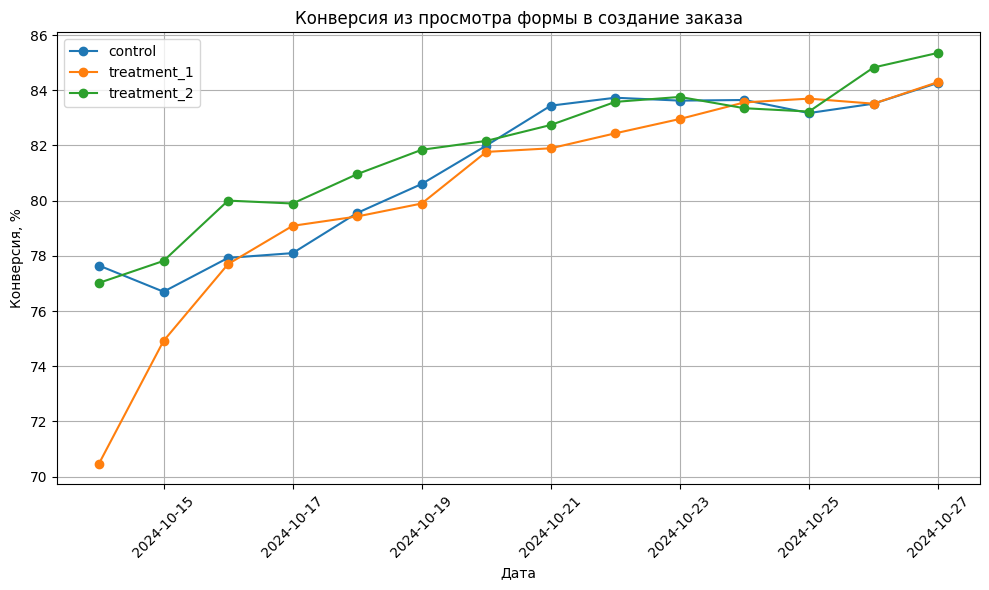

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
data_exp_events = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_data_exp_events.csv')
data_exp_events['time'] = pd.to_datetime(data_exp_events['time'])

# Пустой список для результатов
records = []

# Формируем лист дат для цикла и сортируем его
date_list = data_exp_events['time'].dt.date.unique()
date_list.sort()

# Конверсия из просмотра формы в создание заказа
for current_date in date_list:
    # События до текущей даты включительно
    events_to_date = data_exp_events[data_exp_events['time'].dt.date <= current_date]

    # Фильтруем order_initiate
    initiated_orders_to_date = events_to_date[events_to_date['event_name'] == 'order_initiate']

    # Фильтруем order_create
    created_orders_to_date = events_to_date[events_to_date['event_name'] == 'order_create']

    # Кол-во пользователей, открывших форму заказа
    initiated_users_by_group = initiated_orders_to_date.groupby('group_name')['user_id'].nunique().reset_index()
    initiated_users_by_group = initiated_users_by_group.rename(columns={'user_id': 'users_initiated'})

    # Кол-во пользователей, создавших заказ
    created_users_by_group = created_orders_to_date.groupby('group_name')['user_id'].nunique().reset_index()
    created_users_by_group = created_users_by_group.rename(columns={'user_id': 'users_created'})

    # Объединение и расчёт конверсии
    df_merged_events = pd.merge(initiated_users_by_group, created_users_by_group, on='group_name', how='outer')
    df_merged_events['users_created'] = df_merged_events['users_created'].fillna(0)
    df_merged_events['users_initiated'] = df_merged_events['users_initiated'].fillna(0)
    df_merged_events['conversion'] = 100 * df_merged_events['users_created'] / df_merged_events['users_initiated']

    df_merged_events['date'] = current_date
    records.append(df_merged_events)

# Собираем в итоговый датафрейм
conversion_df = pd.concat(records)

# Строим график
plt.figure(figsize=(10, 6))
for group in conversion_df['group_name'].unique():
    group_data = conversion_df[conversion_df['group_name'] == group]
    plt.plot(group_data['date'], group_data['conversion'], marker='o', label=group)
plt.title('Конверсия из просмотра формы в создание заказа')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 🚕 Задание 3: Итоги теста — вспомогательная метрика 2

## 🎯 Цель
Рассчитать и визуализировать **кумулятивное количество поездок на пользователя**  
для экспериментальных групп за весь период эксперимента.

---

## 📌 Формула метрики

```text
Количество поездок на пользователя = Кол-во успешных поездок / Кол-во пользователей с успешными поездками


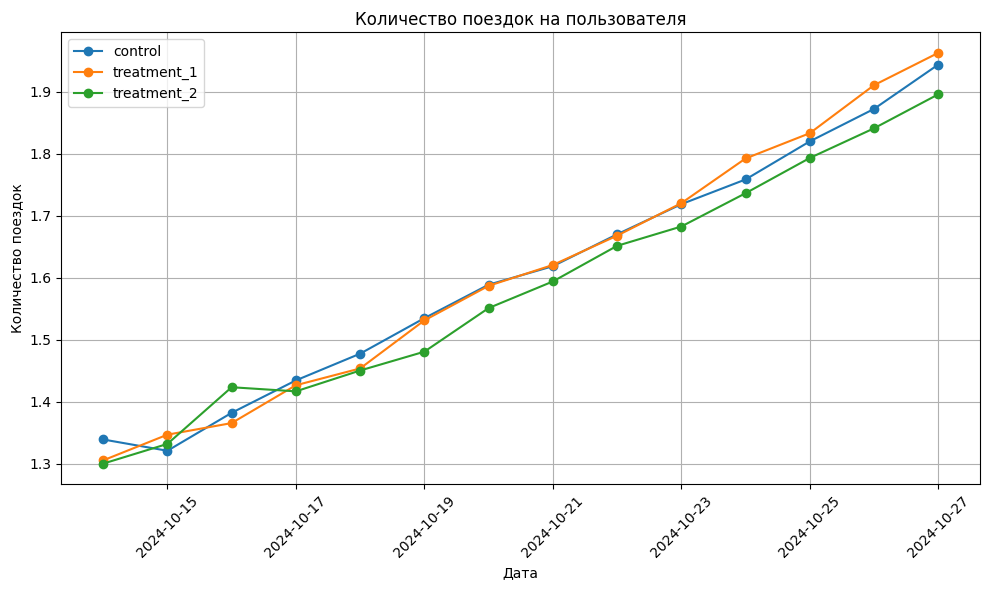

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
data_exp_orders = pd.read_csv('https://code.s3.yandex.net/datasets/PA_5_10_1_data_exp_orders.csv')
data_exp_orders['order_time'] = pd.to_datetime(data_exp_orders['order_time'])

# Пустой список для результатов
records = []

# Формируем лист дат для цикла и сортируем его
date_list = data_exp_orders['order_time'].dt.date.unique()
date_list.sort()

# Расчёт количества поездок на пользователя
for current_date in date_list:
    # Выполненные заказы до текущей даты включительно
    completed_orders_to_date = data_exp_orders[
        (data_exp_orders['order_time'].dt.date <= current_date) &
        (data_exp_orders['status'] == 'completed')
    ]

    # Количество поездок всего (orders_total)
    orders_by_group = completed_orders_to_date.groupby('group_name')['order_id'].nunique().reset_index()
    orders_by_group = orders_by_group.rename(columns={'order_id': 'orders_total'})

    # Количество уникальных пользователей (users_total)
    users_by_group = completed_orders_to_date.groupby('group_name')['user_id'].nunique().reset_index()
    users_by_group = users_by_group.rename(columns={'user_id': 'users_total'})

    # Объединение и расчёт метрики
    df_merged_orders = pd.merge(orders_by_group, users_by_group, how='outer', on='group_name')
    df_merged_orders['trips_per_user_to_date'] = df_merged_orders['orders_total'] / df_merged_orders['users_total']

    df_merged_orders['date'] = current_date
    records.append(df_merged_orders)

# Собираем итоговый датафрейм
trips_number_df = pd.concat(records)

# Строим график
plt.figure(figsize=(10, 6))

for group in trips_number_df['group_name'].unique():
    group_data = trips_number_df[trips_number_df['group_name'] == group]
    plt.plot(group_data['date'], group_data['trips_per_user_to_date'], marker='o', label=group)

plt.title('Количество поездок на пользователя')
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
